### IMPORT LIBRARY

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from plotly.offline import iplot , plot 
from plotly.subplots import make_subplots

### LOAD DATA 

In [3]:
df =pd.read_csv("C:/Users/LAP ME/Downloads/heart.csv")

### EXPLORATION FOR DATA 

In [4]:
df.shape

(918, 12)

In [5]:
df.sample(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
222,48,F,NAP,120,195,0,Normal,125,N,0.0,Up,0
879,48,M,ATA,110,229,0,Normal,168,N,1.0,Down,1
552,71,M,NAP,144,221,0,Normal,108,Y,1.8,Flat,1
258,51,F,NAP,150,200,0,Normal,120,N,0.5,Up,0


In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.isna().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

### VISUALIZATION ON DATA

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



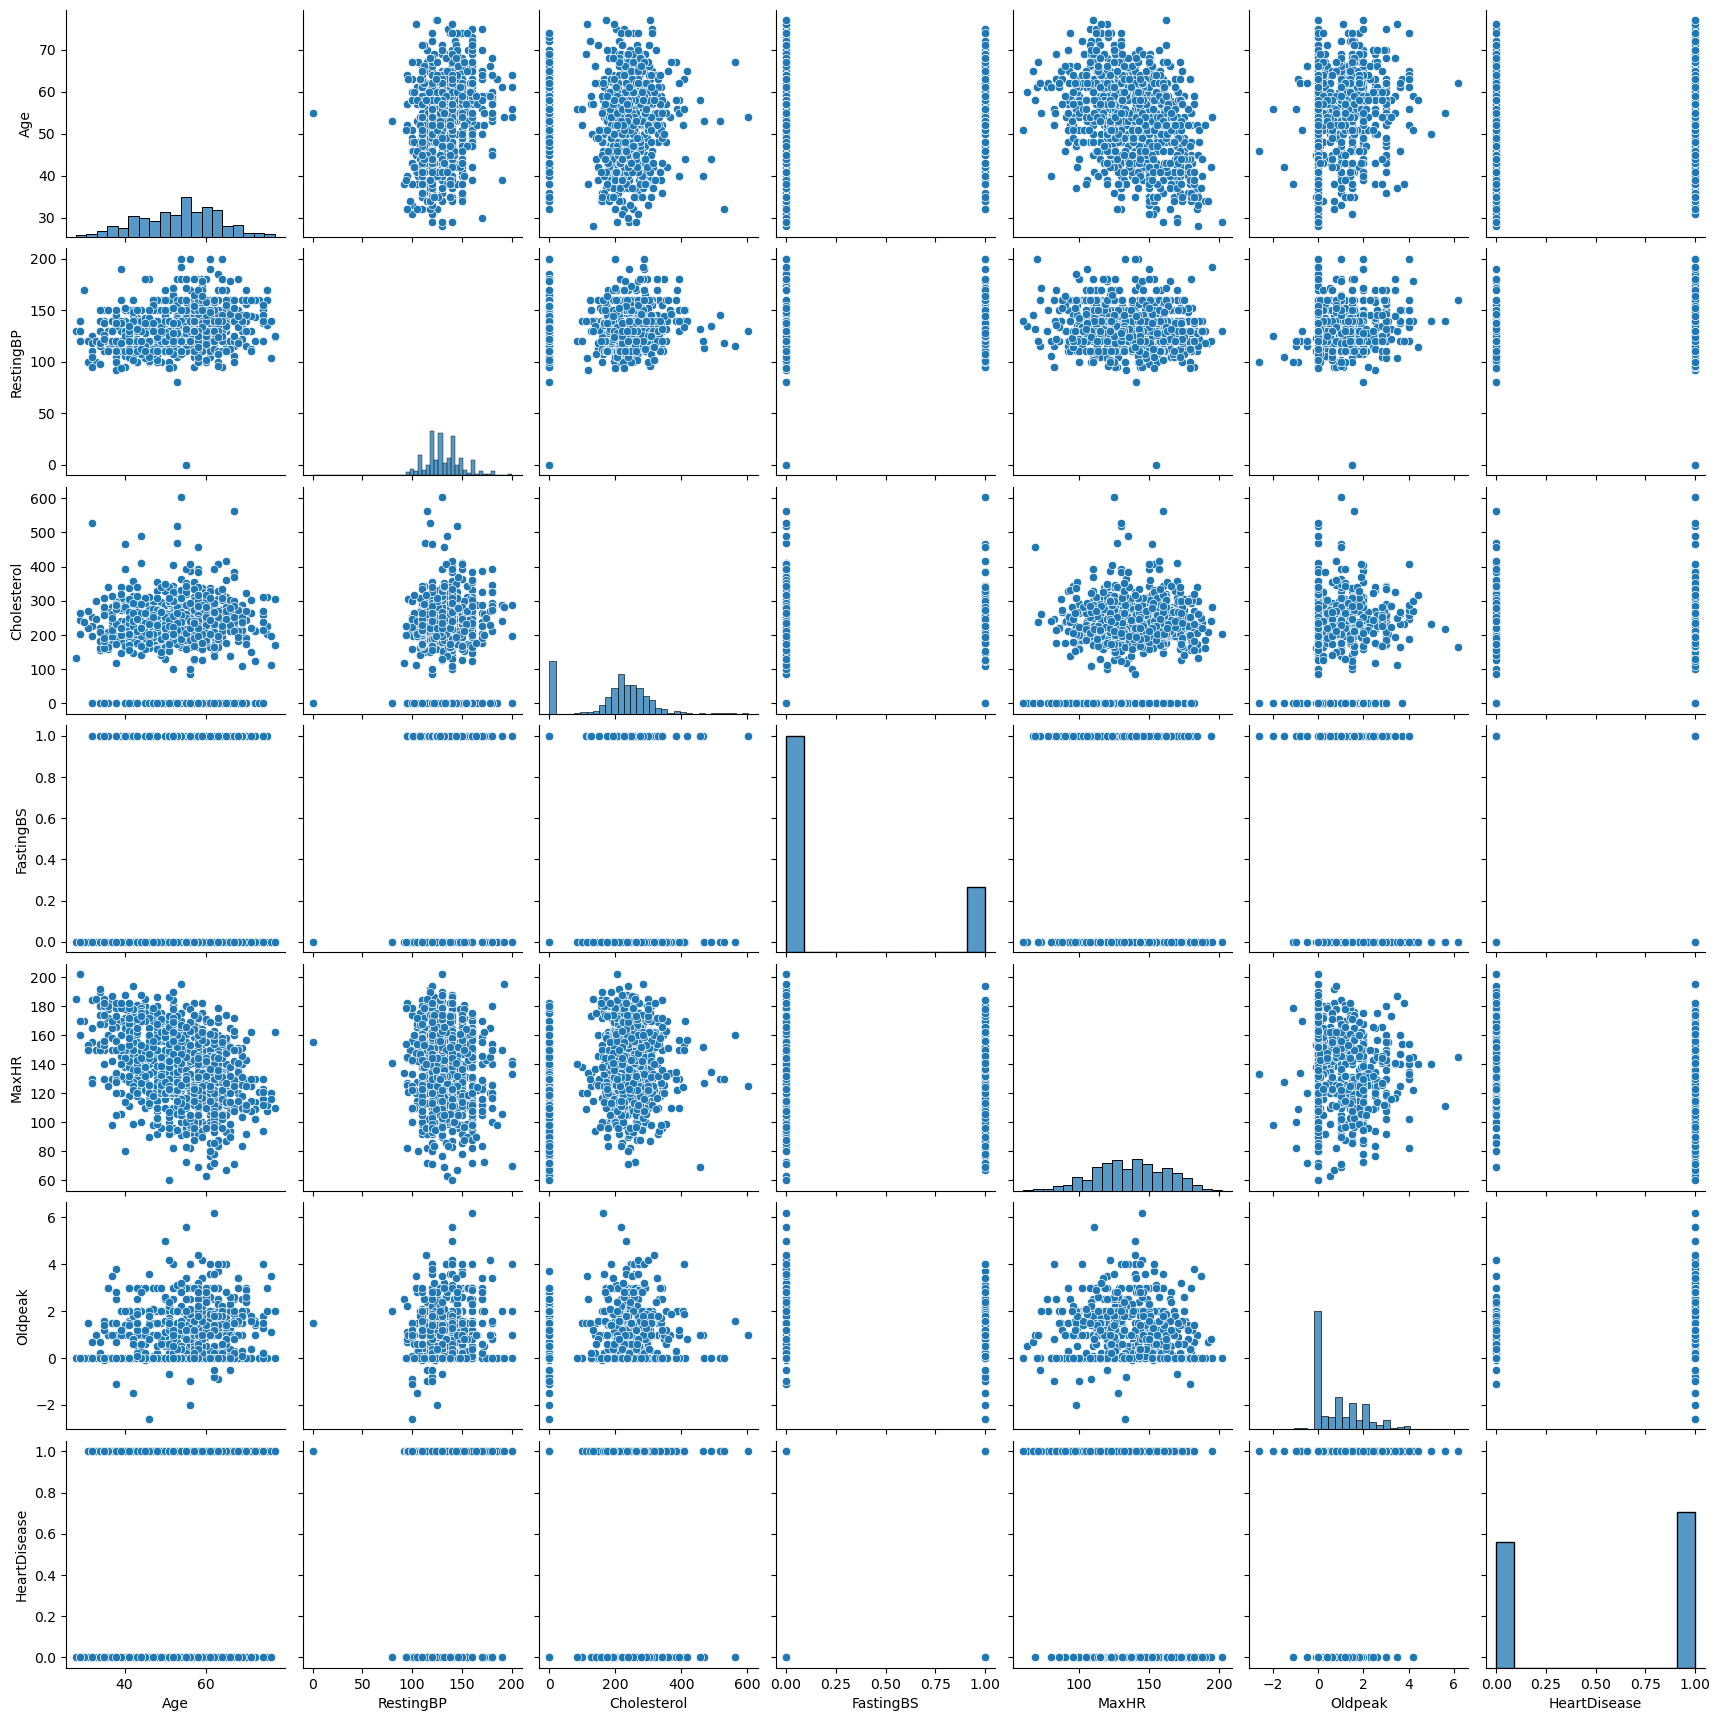

In [13]:
sns.pairplot(df)

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



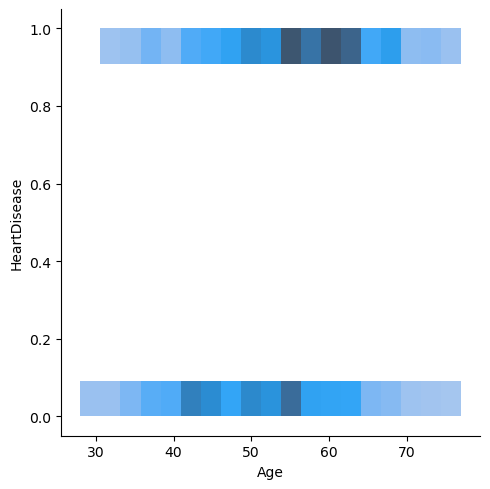

In [14]:
sns.displot(x=df['Age'],y=df['HeartDisease'])

<Axes: xlabel='Age', ylabel='Count'>

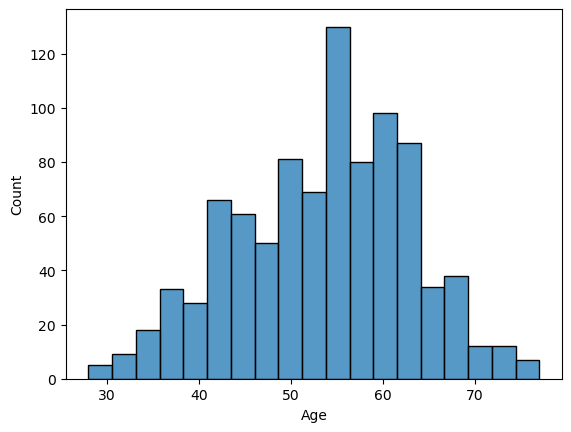

In [15]:
sns.histplot(df['Age'])

<Axes: ylabel='HeartDisease'>

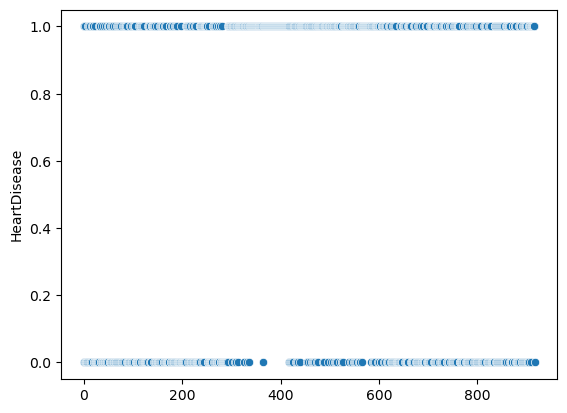

In [16]:
sns.scatterplot(df['HeartDisease'])

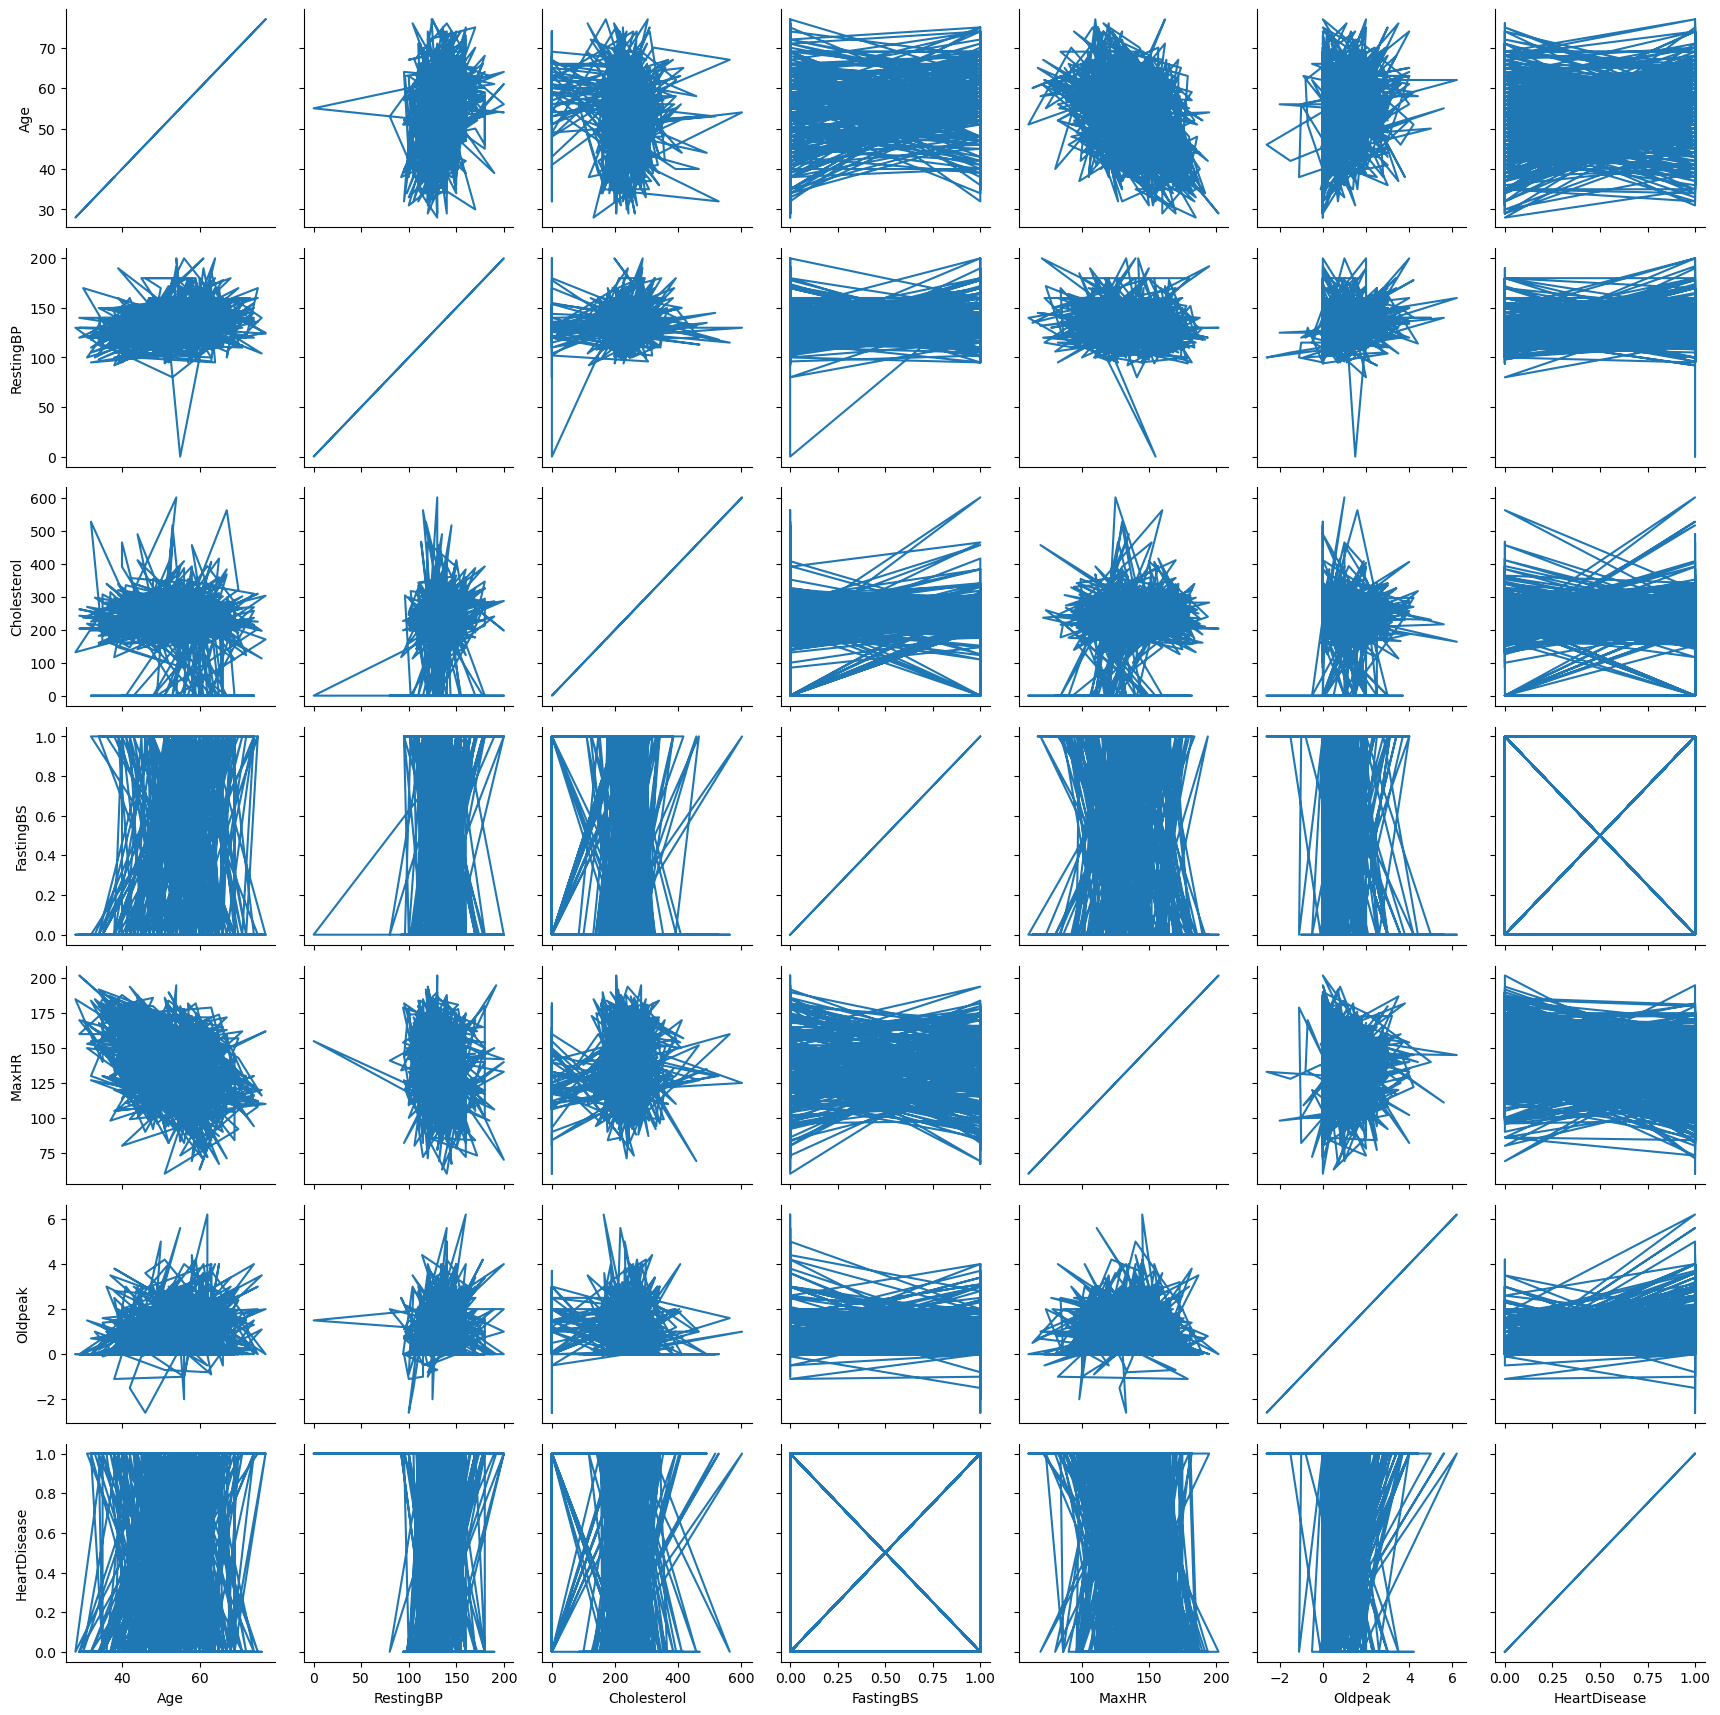

In [31]:
plot = sns.PairGrid(df)
plot.map(plt.plot)
plt.show()

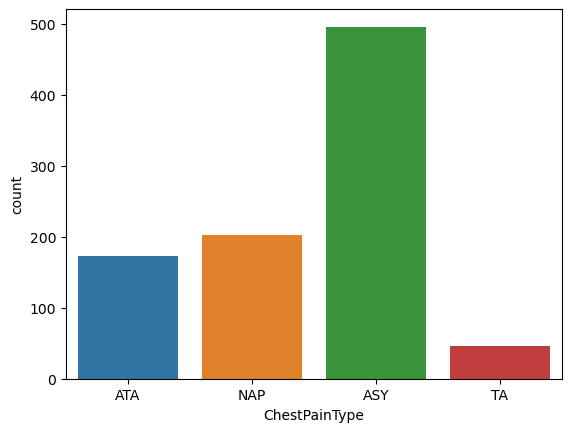

In [36]:
sns.countplot(x = 'ChestPainType' , data = df)
plt.show()


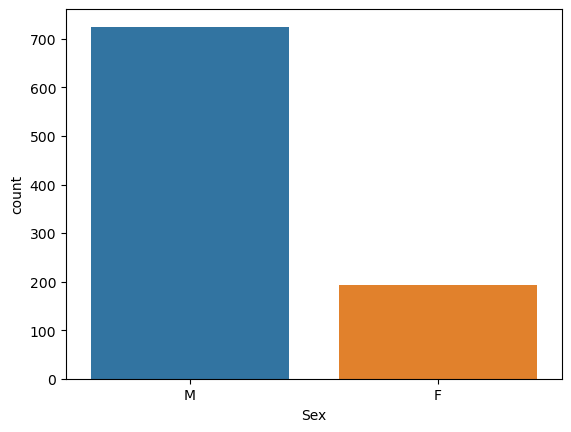

In [38]:
sns.countplot(x = 'Sex' , data = df)
plt.show()


### DATA PREPROCESSING

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
encoder=LabelEncoder()

### SPLIT DATA FOR PREPROCESSSING

In [42]:
x=df.drop("HeartDisease",axis=1)
y=df['HeartDisease']

In [43]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [44]:
for col in x.columns:
    x[col]=encoder.fit_transform(x[col])

In [45]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [46]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,shuffle=True,random_state=42)

In [52]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (642, 11)
y_train shape =  (642,)
x_test shape =  (276, 11)
y_test shape =  (276,)


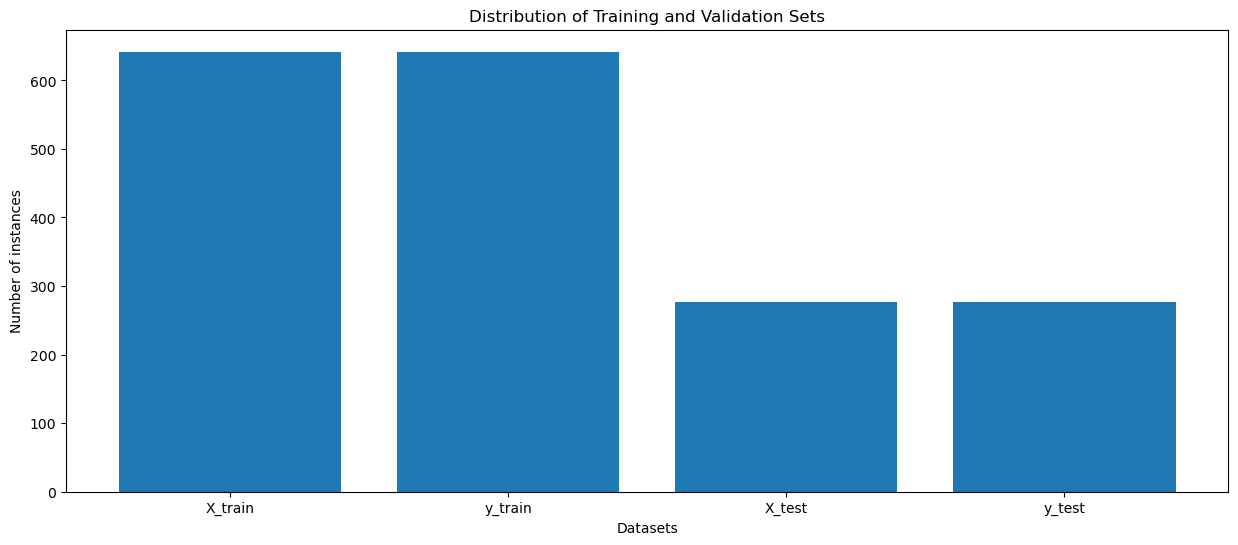

In [53]:
shapes = {
    'X_train': x_train.shape[0],
    'y_train': y_train.shape[0],
    'X_test': x_test.shape[0],
    'y_test': y_test.shape[0]
}
plt.figure(figsize=(15, 6))
plt.bar(shapes.keys(), shapes.values())
plt.xlabel('Datasets')
plt.ylabel('Number of instances')
plt.title('Distribution of Training and Validation Sets')
plt.show()

### SCALIN DATA 

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler=StandardScaler()

In [57]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### LOGICTIC REGRESSION MODEL


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report # for Precision and Recall Analysis


In [61]:
lr_model=LogisticRegression() # call model


In [62]:
lr_model.fit(x_train,y_train)


LogisticRegression()

In [64]:
y_pred=lr_model.predict(x_test)

In [ ]:
y_pred

In [65]:
 con= confusion_matrix(y_test,y_pred) # Evaluation of Model Performance & Sensitivity and Specificity Analysis

<Axes: >

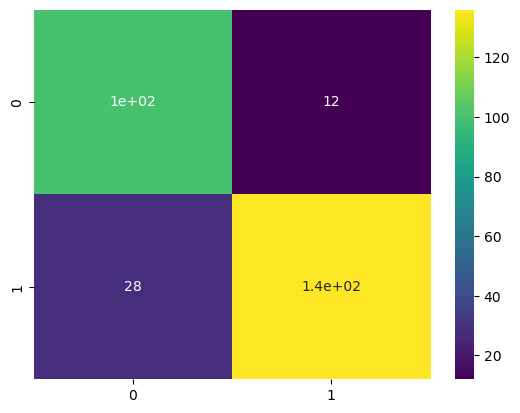

In [66]:
sns.heatmap(con, annot=True, cmap='viridis', cbar=True) # heatmap for Matrix Data Representation

In [67]:
print("classification_report is ",classification_report(y_test ,y_pred)) 

classification_report is                precision    recall  f1-score   support

           0       0.78      0.89      0.83       112
           1       0.92      0.83      0.87       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



### SVM_MODEL

In [69]:
from sklearn.svm import SVC

In [70]:
from sklearn.svm import SVC ## call model 


In [71]:
svm_model =SVC()

In [72]:
svm_model.fit(x_train, y_train)

SVC()

In [73]:
y_pred = svm_model.predict(x_test)


In [74]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [75]:
print("classification_report is ",classification_report(y_test ,y_pred)) 

classification_report is                precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.92      0.87      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



### DECISION_TREE_MODEL 

In [76]:
from sklearn.tree import DecisionTreeClassifier


In [77]:
dt_model = DecisionTreeClassifier()


In [78]:
from sklearn.model_selection import GridSearchCV



In [79]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,10,20,25],
    'min_samples_leaf' : [10,20,30,40]
}

In [80]:

grid_search = GridSearchCV(dt_model, params, cv = 5 )

In [81]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [10, 20, 30, 40]})

In [82]:
print(grid_search.best_params_)


{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 40}


In [83]:
print(grid_search.best_score_)

0.8254723837209301


In [84]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 30)

In [85]:
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=30)

In [86]:
dt_pred = dt_model.predict(x_test)



In [87]:
train_dt_pred = dt_model.predict(x_train)


In [88]:
print("Testing Classification Report of DecisionTreeClassifier : ")
print(classification_report(y_test, dt_pred))

Testing Classification Report of DecisionTreeClassifier : 
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       112
           1       0.85      0.85      0.85       164

    accuracy                           0.82       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.82      0.82      0.82       276



In [89]:
print("Training Classification Report of DecisionTreeClassifier : ")
print(classification_report(y_train, train_dt_pred))

Training Classification Report of DecisionTreeClassifier : 
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       298
           1       0.83      0.89      0.86       344

    accuracy                           0.84       642
   macro avg       0.84      0.84      0.84       642
weighted avg       0.84      0.84      0.84       642

